# The Pandas Reference Notebook

In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

import seaborn as sns

## Data Import Options

### Importing Selected Columns, Parsing DateTime Columns

In [ ]:
df = pd.read_csv("data.csv",
                 sep=',',
                 index_col='COLUMN_A',
                 usecols=['COLUMN_A', 'COLUMN_B',
                          'COLUMN_C', 'COLUMN_DT',
                          'COLUMN_DT2'],
                 parse_dates=['COLUMN_DT1', 'COLUMN_DT2']
                 )

## Data Cleaning

### Nulls

#### Count Nulls

In [ ]:
df.isnull().sum()

#### Fill NAs with Numeric Mean

In [ ]:
df = df.fillna(df.mean())

#### Remove Columns with greater than half NAs

In [ ]:
half_count = len(df) / 2
df = df.dropna(thresh=half_count, axis=1)

### Column Manipulation

#### Select only Columns of certain type

In [ ]:
numeric_df = df.select_dtypes(include=["int","float"], exclude=None)

#### Remove Prefixes and Suffixes and Change to Numeric

In [ ]:
# Convert object columns to float columns
df["percentages"] = df["percentages"].str.rstrip('%').astype("float")
df["dollars"] = df["dollars"].str.lstrip('$').astype("float")

## Preliminary Data Visualization

### Correlation Heatmap

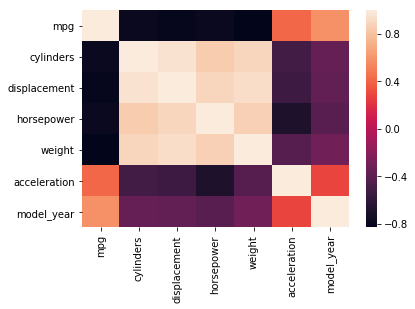

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

cars = sns.load_dataset('mpg')
cars.head()

sns.heatmap(cars.corr())
plt.show()

## Data Preparation

### Column and Index Management (rename, reset index, sort)

In [88]:
df_a = pd.DataFrame({'REVENUE':[2,1,3,2,6],
                     'MONTH':["JAN","JAN","FEB","FEB","FEB"],
                     'DAY':[30,31,1,2,3]
                    })


df_a.sort_values("REVENUE",ascending=False)\
.reset_index()\
.rename(columns={"index":"OLD INDEX",
                     "REVENUE":"PROJECTED_REVENUE"
                    })

,OLD INDEX,PROJECTED_REVENUE,MONTH,DAY
0,4,6,FEB,3
1,2,3,FEB,1
2,0,2,JAN,30
3,3,2,FEB,2
4,1,1,JAN,31


### Transpose

In [89]:
df_a = df_a.transpose()
df_a

,0,1,2,3,4
REVENUE,2,1,3,2,6
MONTH,JAN,JAN,FEB,FEB,FEB
DAY,30,31,1,2,3


### Shuffle and Split

In [92]:
# Reshuffle Row Wise
df = df.sample(frac=1.0, random_state=42)

# Splitting the Data Set
train = df.sample(frac=0.8, random_state=1)
test = df[~df.index.isin(train.index)]

### Dummy Categorical Variables

In [99]:
df = pd.DataFrame({'COLOUR': ['BLACK','WHITE','BLACK','BLACK','WHITE','BLACK'],
                   'SIZE': ['SMALL','SMALL','SMALL','BIG','BIG','BIG']
                  })
print(df)
DUMMY_CAT_A = pd.get_dummies(df["COLOUR"], prefix="COLOUR")
df = pd.concat([df, DUMMY_CAT_A], axis=1)

DUMMY_CAT_B = pd.get_dummies(df["SIZE"], prefix="SIZE")
df = pd.concat([df, DUMMY_CAT_B], axis=1)

df.drop(["COLOUR","SIZE"], inplace=True, axis=1)

print()
print(df)

  COLOUR   SIZE
0  BLACK  SMALL
1  WHITE  SMALL
2  BLACK  SMALL
3  BLACK    BIG
4  WHITE    BIG
5  BLACK    BIG

   COLOUR_BLACK  COLOUR_WHITE  SIZE_BIG  SIZE_SMALL
0             1             0         0           1
1             0             1         0           1
2             1             0         0           1
3             1             0         1           0
4             0             1         1           0
5             1             0         1           0


### String Accessors

#### String Column Split

In [100]:
df = pd.DataFrame({'ABC': ['A1-B1-C1', 'A2-B2-C2']})

df['ABC'].str.split('-', 2).str[1]

0    B1
1    B2
Name: ABC, dtype: object

#### Regex Extract

In [3]:
df = pd.DataFrame({'ADDRESS_LINE': ['1 PARK LANE, Singapore 123874', '77 United Ave, Singapore 474747']})

df["POSTAL_CODE"] = df["ADDRESS_LINE"].str.extract(r'([0-9]{6}(?=$|\,))', expand=False)
df["POSTAL_CODE"]

0    123874
1    474747
Name: POSTAL_CODE, dtype: object

#### String Length

In [6]:
df["ADDRESS_LINE"].str.len()

0    29
1    31
Name: ADDRESS_LINE, dtype: int64

#### Contains Filter

In [106]:
df = pd.DataFrame({"FIRST_NAME":["John Doe","Jane Doe","Mary Jane","Mary Joe"]})

print(df)

df_johns_marys = df.loc[(df['FIRST_NAME'].str.lower().str.contains("john")) |
                        (df['FIRST_NAME'].str.lower().str.contains("mary"))
                       ].copy()

print()
print(df_johns_marys)

  FIRST_NAME
0   John Doe
1   Jane Doe
2  Mary Jane
3   Mary Joe

  FIRST_NAME
0   John Doe
2  Mary Jane
3   Mary Joe


### Datetime Accessor

#### Get Hour and Date

In [ ]:
df["DT1 Hour"] = df['COLUMN_DT1'].dt.hour
df["DT1 Date"] = df['COLUMN_DT1'].dt.date

#### Get Time Difference in Seconds

In [ ]:
df["TIME_DIFF"] = df['COLUMN_DT1'] - df['COLUMN_DT2']
df["TIME_DIFF_SECONDS"] = df["TIME_DIFF"].dt.seconds

## Joining and Merging

### Basic Left Join

In [32]:
df_a = pd.DataFrame({'REVENUE':[2,1,3,2,6],
                     'MONTH':["JAN","JAN","FEB","FEB","FEB"],
                     'DAY':[30,31,1,2,3]
                    })

df_b = pd.DataFrame({'COSTS':[1,2,3],
                     'MONTH':["JAN","JAN","FEB"],
                     'DAY':[30,31,1],
                     'REVENUE':[2,2,1]
                    })

df_merged = pd.merge(left=df_a,
                     right=df_b,
                     on=["MONTH",
                         "DAY"],
                     how="left",
                     suffixes=("_PROJECTED","_FINAL")
                    )

df_merged

,REVENUE_PROJECTED,MONTH,DAY,COSTS,REVENUE_FINAL
0,2,JAN,30,1.0,2.0
1,1,JAN,31,2.0,2.0
2,3,FEB,1,3.0,1.0
3,2,FEB,2,NaN,NaN
4,6,FEB,3,NaN,NaN


### Stacking and Unstacking

In [74]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [75]:
s.unstack(level=-1)

,a,b
one,1.0,2.0
two,3.0,4.0


In [76]:
s.unstack(level=0)

,one,two
a,1.0,3.0
b,2.0,4.0


In [77]:
s = s.unstack(level=0)

In [78]:
s.stack()

a  one    1.0
   two    3.0
b  one    2.0
   two    4.0
dtype: float64

## Aggregation and Groupby

In [108]:
df = pd.DataFrame(np.random.randint(1,10,(10,4)), columns=list('ABCD'))
df['G1'] = [0, 0, 1, 1, 1, 1, 2, 2, 2, 3]
df['G2'] = ["X", "X", "X", "X", "O", "O", "X", "O", "O", "O"]
df

,A,B,C,D,G1,G2
0,1,4,5,7,0,X
1,4,7,3,2,0,X
2,8,6,7,4,1,X
3,7,9,3,3,1,X
4,8,3,2,4,1,O
5,2,3,2,1,1,O
6,2,4,3,5,2,X
7,7,8,7,6,2,O
8,8,2,5,1,2,O
9,3,3,3,3,3,O


### Basic Aggregation

In [111]:
df.groupby(["G1","G2"]).mean()

A    B    C    D
G1 G2                    
0  X   2.5  5.5  4.0  4.5
1  O   5.0  3.0  2.0  2.5
   X   7.5  7.5  5.0  3.5
2  O   7.5  5.0  6.0  3.5
   X   2.0  4.0  3.0  5.0
3  O   3.0  3.0  3.0  3.0

### Custom Aggregation

In [112]:
df

,A,B,C,D,G1,G2
0,1,4,5,7,0,X
1,4,7,3,2,0,X
2,8,6,7,4,1,X
3,7,9,3,3,1,X
4,8,3,2,4,1,O
5,2,3,2,1,1,O
6,2,4,3,5,2,X
7,7,8,7,6,2,O
8,8,2,5,1,2,O
9,3,3,3,3,3,O


In [130]:
df.groupby(["G1", "G2"]).agg(sum_A=('A', 'sum'),
                             max_A=('A', 'max'),
                             mean_B=('B', 'mean'),
                             sum_C=('C', 'sum'),
                             median_C=('C', 'median'),
                             lambda_D=('D', lambda x: x.max() - x.min())
                             )

sum_A  max_A  mean_B  sum_C  median_C  lambda_D
G1 G2                                                 
0  X       5      4     5.5      8         4         5
1  O      10      8     3.0      4         2         3
   X      15      8     7.5     10         5         1
2  O      15      8     5.0     12         6         5
   X       2      2     4.0      3         3         0
3  O       3      3     3.0      3         3         0

### Widow Functions

#### Rank Over Partition

In [51]:
df = pd.DataFrame(np.random.randint(1,10,(10,4)), columns=list('ABCD'))
df['G1'] = [0, 0, 1, 1, 1, 1, 2, 2, 2, 3]
df['G2'] = ["TYPE_A", "TYPE_A", "TYPE_A", "TYPE_A", "TYPE_B", "TYPE_B", "TYPE_A", "TYPE_B", "TYPE_B", "TYPE_B"]
df

df['RANK'] = df.sort_values(['A','B'], ascending=[True,False]) \
             .groupby(['G2']) \
             .cumcount() + 1

df.sort_values(['G2','A','B'], ascending=[True,True,False])

,A,B,C,D,G1,G2,RANK
1,2,1,1,4,0,TYPE_A,1
3,3,3,9,2,1,TYPE_A,2
6,3,2,4,9,2,TYPE_A,3
0,4,8,3,4,0,TYPE_A,4
2,6,7,9,6,1,TYPE_A,5
7,2,1,6,1,2,TYPE_B,1
4,3,7,1,7,1,TYPE_B,2
9,4,6,2,2,3,TYPE_B,3
5,6,1,6,4,1,TYPE_B,4
8,9,1,2,2,2,TYPE_B,5


#### Cumulative Sum

In [50]:
df = pd.DataFrame(np.random.randint(1,50,(10,2)), columns=['COST','REVENUE'])
df['DAY'] = [1,2,3,4,5,1,2,3,4,5]
df['SHOP'] = ['A','A','A','A','A',
             'B','B','B','B','B',]

df.groupby(by=['SHOP','DAY']).sum().groupby(["SHOP"]).cumsum().reset_index()


,SHOP,DAY,COST,REVENUE
0,A,1,48,43
1,A,2,74,64
2,A,3,104,71
3,A,4,105,79
4,A,5,117,83
5,B,1,35,39
6,B,2,41,63
7,B,3,58,86
8,B,4,96,103
9,B,5,121,110


## Misc

### Calculating Entropy of a Column

In [ ]:
import math

prob_1 = income[income["high_income"]==1].shape[0]/income.shape[0]
prob_0 = income[income["high_income"]==0].shape[0]/income.shape[0]

income_entropy = -( (prob_1*math.log(prob_1,2)) + (prob_0*math.log(prob_0,2)) )

## Non-Pandas Useful

### Smallest or Largest Key in a Dictionary

In [ ]:
abd = {0: 8.165, 1: 4.041,
       2: 3.025, 3: 17.652, 4: 14.111}

print(min(abd, key=abd.get))
print(max(abd, key=abd.get))

### Find Index of Max in List

In [ ]:
highest_gain_index = information_gains.index(max(information_gains))

### Function Mapping/Filtering

In [17]:
strings = ["12.1", "13.0", "14.4"]
floats = list(map(float,strings))

passwords = ["123321", "password", "wrong", "palindrordnilap"]

pw_lengths = list(map(len,passwords))
print(pw_lengths)

[6, 8, 5, 15]


In [18]:
# Filter returns a True or False Boolean
def is_palindrome(my_string):
    return my_string == my_string[::-1]

palindrome_passwords = list(filter(is_palindrome,passwords))
print(palindrome_passwords)

['123321', 'palindrordnilap']


### Summing A List of Dictionaries Values to a Single Dictionary¶

In [19]:
from collections import Counter

a = {"a":20,
    "b":10,}

b = {"b":40,
    "c":10,}

dict_list = [a,b]

sum_dict = sum(map(Counter, dict_list),Counter())

# Counter count Object -> dict object
dict(sum_dict)

{'a': 20, 'b': 50, 'c': 10}

### Get Index of 3 Highest Value in Array in no Particular Order

In [27]:
array = np.asarray([100.0,10.0,200.0,20.0,300.0,30.0])
np.argpartition(array,-3)[-3:]

array([0, 4, 2], dtype=int64)

## Quick Examples


### Time Series DataFrames


In [17]:
waves = pd.read_csv('WAVES.csv')
waves.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


### Product Details DataFrames


In [12]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

### Text Mining Processing DataFrames


In [14]:
airbnb_ny = pd.read_csv("AB_NYC_2019.csv")
airbnb_ny.head()

### Geographic Coordinates DataFrames

In [ ]:
airbnb_ny = pd.read_csv("AB_NYC_2019.csv")
airbnb_ny.head()